**Общая информация**

**Срок сдачи:** 20 марта 2019, 06:00 <br\>
**Штраф за опоздание:** -1 балл после 06:00 20 марта, -2 балла после 06:00 27 марта, -3 балла после 06:00 3 апреля
-4 балла после 06:00 10 апреля

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий в slack @alkhamush

Необходимо в slack скинуть ссылку в личный чат @alkhamush
Пример ссылки:
https://github.com/stroykova/spheremailru/stroykova_hw1.ipynb 


Используйте данный Ipython Notebook при оформлении домашнего задания.

##### Задание 1 (2 баллов)
Реализовать KNN в классе MyKNeighborsClassifier (обязательное условие: точность не ниже sklearn реализации)
Разберитесь самостоятельно, какая мера расстояния используется в KNeighborsClassifier дефолтно и реализуйте свой алгоритм именно с этой мерой. Самостоятельно разберитесь, как считается score из KNeighborsClassifier и реализуйте аналог в своём классе. Score не должен уступать значению KNN из sklearn

###### Задание 2 (2 балла)
Добиться скорости работы на fit,  predict и predict_proba сравнимой со sklearn для iris и mnist
Для этого используем numpy

###### Задание 3 (2 балла)
Для iris найдите такой параметр n_neighbors, при котором выдаётся наилучший score. Нарисуйте график зависимости score от n_neighbors

###### Задание 4 (3 балла)
Добавить algorithm='kd_tree' в реализацию KNN (использовать KDTree из sklearn.neighbors). Добиться скорости работы на fit,  predict и predict_proba сравнимой со sklearn для iris и mnist
Для этого используем numpy. Score не должен уступать значению KNN из sklearn

###### Задание 5 (1 балла)
Описать для чего нужны следующие библиотеки/классы/функции (список будет ниже)

**Штрафные баллы:**

1. Невыполнение PEP8 -0.5 баллов
2. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw1.ipynb) -0.5 баллов
3. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -0.5 баллов
4. При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. Не нужно удалять и видоизменять структуру кода и текст. В противном случае -0.5 баллов


In [18]:
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn import datasets
from sklearn.base import ClassifierMixin
from sklearn.datasets import fetch_mldata, fetch_openml
from sklearn.neighbors.base import NeighborsBase, KNeighborsMixin, SupervisedIntegerMixin 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, KDTree

# %load_ext pycodestyle_magic

In [57]:
#%%pycodestyle


class MyKNeighborsClassifier(NeighborsBase, KNeighborsMixin,
                             SupervisedIntegerMixin, ClassifierMixin):

    def __init__(self, n_neighbors=5, algorithm='brute'):
        self.n_neighbors = n_neighbors
        self.algorithm = algorithm

    def fit(self, X, y):
        self.Data = X
        self.Type = y
        self.classes = np.unique(self.Type)
        if self.algorithm == 'kd_tree':
            self.tree = KDTree(self.Data)

    def predict(self, X):
        B = np.zeros(shape=(len(X[:, 0])))
        if self.algorithm == 'brute':
            A1 = np.sum(self.Data**2, axis=1).reshape(-1, 1)
            A2 = np.sum(X**2, axis=1).reshape(-1, 1).T
            A3 = A1+A2
            A12 = 2*np.dot(self.Data, X.T)
            A = np.argsort(A3-A12, axis=0)[0:self.n_neighbors]
        if self.algorithm == 'kd_tree':
            A = self.tree.query(X, return_distance=False,
                                k=self.n_neighbors)
            A = A[:, 0:self.n_neighbors].T
        y = self.Type[A].astype(int)
        for i in range(len(X[:, 0])):
            unicue, counts = np.unique(y[:, i], return_counts=True)
            C = np.append(unicue.reshape(-1, 1), counts.reshape(-1, 1), axis=1)
            C = C[C[:, 1].argsort()]
            B[i] = C[-1, 0]
        return B

    def predict_proba(self, X):
        B = np.zeros(shape=(len(X[:, 0]), len(np.unique(self.Type))))
        A1 = np.sum(self.Data**2, axis=1).reshape(-1, 1)
        A2 = np.sum(X**2, axis=1).reshape(-1, 1).T
        A12 = 2*np.dot(self.Data, X.T)
        A3 = A1+A2
        A = np.argsort(A3-A12, axis=0)[0:self.n_neighbors]
        if self.algorithm == 'kd_tree':
            A = self.tree.query(X, return_distance=False,
                                k=self.n_neighbors)
            A = A[:, 0:self.n_neighbors].T
        y = self.Type[A].astype(int)
        for i in range(len(X[:, 0])):
            counts_all = np.zeros(shape=(len(self.classes)))
            for j in range(self.n_neighbors):
                b = int(y[j, i])
                counts_all[b] = counts_all[b]+1
            B[i] = counts_all/self.n_neighbors
        return B

    def score(self, X, y):
        B = self.predict(X)
        A = B == y.astype(np.int)
        return A.sum()/len(A)

**IRIS**

In [20]:
iris = datasets.load_iris()

In [21]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [22]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='brute')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='brute')

In [23]:
%time clf.fit(X_train, y_train)

CPU times: user 708 µs, sys: 109 µs, total: 817 µs
Wall time: 575 µs


KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=2,
           weights='uniform')

In [24]:
%time my_clf.fit(X_train, y_train)

CPU times: user 136 µs, sys: 0 ns, total: 136 µs
Wall time: 107 µs


In [25]:
%time clf.predict(X_test)

CPU times: user 1.39 ms, sys: 214 µs, total: 1.6 ms
Wall time: 7.27 ms


array([0, 1, 0, 1, 2, 1, 0, 1, 1, 0, 2, 0, 2, 2, 2])

In [26]:
%time my_clf.predict(X_test)

CPU times: user 2.08 ms, sys: 0 ns, total: 2.08 ms
Wall time: 1.29 ms


array([0., 1., 0., 1., 2., 1., 0., 1., 1., 0., 2., 0., 2., 2., 2.])

In [27]:
%time clf.predict_proba(X_test)

CPU times: user 1.5 ms, sys: 0 ns, total: 1.5 ms
Wall time: 994 µs


array([[1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]])

In [28]:
%time my_clf.predict_proba(X_test)

CPU times: user 906 µs, sys: 0 ns, total: 906 µs
Wall time: 571 µs


array([[1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]])

In [29]:
clf.score(X_test, y_test)

1.0

In [30]:
my_clf.score(X_test, y_test)

1.0

Задание 3

max score:
1.0
count of n_neghbors for max score:
1


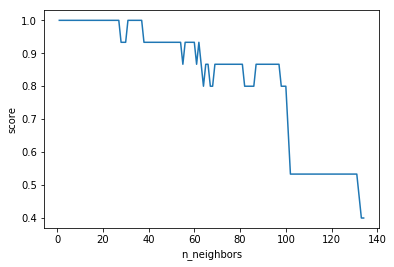

In [31]:
a = np.zeros(shape=(len(X_train[:, 0])))
for i in range(1,len(X_train[:, 0])):
    my_clf = MyKNeighborsClassifier(n_neighbors=i, algorithm='brute')
    my_clf.fit(X_train, y_train)
    my_clf.predict(X_test)
    a[i] = my_clf.score(X_test, y_test)
print("max score:")
print(a.max())
print("count of n_neghbors for max score:")
print(a.argmax())

plt.plot(range(1,len(X_train[:, 0])),np.array(a[1:len(X_train[:, 0])]))
plt.xlabel('n_neighbors')
plt.ylabel('score')
plt.show()

**MNIST**

In [32]:
mnist = fetch_openml('mnist_784')

In [33]:
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.01, stratify=mnist.target)

In [54]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='brute')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='brute')

In [35]:
%time clf.fit(X_train, y_train)

CPU times: user 124 ms, sys: 59 µs, total: 124 ms
Wall time: 124 ms


KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=2,
           weights='uniform')

In [55]:
%time my_clf.fit(X_train, y_train)

CPU times: user 46.5 ms, sys: 45 µs, total: 46.5 ms
Wall time: 45.8 ms


In [37]:
%time clf.predict(X_test)

CPU times: user 3.31 s, sys: 217 ms, total: 3.53 s
Wall time: 1.19 s


array(['5', '3', '5', '8', '5', '7', '2', '8', '4', '3', '6', '1', '9',
       '4', '7', '0', '4', '6', '7', '4', '4', '1', '4', '4', '7', '7',
       '1', '8', '2', '9', '0', '8', '1', '3', '9', '0', '0', '6', '8',
       '3', '2', '4', '9', '9', '6', '5', '4', '6', '5', '5', '1', '9',
       '8', '2', '8', '9', '0', '3', '0', '8', '9', '9', '6', '6', '1',
       '4', '4', '6', '7', '7', '1', '5', '5', '5', '0', '5', '1', '5',
       '1', '7', '5', '5', '1', '2', '0', '0', '8', '2', '6', '8', '3',
       '4', '1', '6', '8', '3', '4', '7', '9', '4', '3', '7', '1', '0',
       '2', '5', '8', '6', '2', '9', '4', '7', '3', '7', '4', '2', '3',
       '9', '3', '7', '8', '1', '0', '8', '8', '4', '7', '0', '3', '1',
       '6', '9', '0', '8', '8', '4', '6', '9', '6', '2', '1', '1', '6',
       '1', '3', '4', '2', '1', '1', '5', '4', '5', '6', '8', '2', '4',
       '3', '5', '5', '0', '0', '7', '0', '9', '4', '4', '8', '7', '3',
       '0', '7', '7', '8', '1', '3', '9', '0', '9', '1', '9', '3

In [38]:
%time my_clf.predict(X_test)

CPU times: user 9.23 s, sys: 706 ms, total: 9.93 s
Wall time: 6.68 s


array([5., 8., 5., 8., 8., 7., 2., 8., 4., 9., 6., 1., 9., 4., 7., 0., 4.,
       6., 7., 4., 4., 1., 4., 4., 7., 7., 1., 8., 2., 9., 0., 8., 1., 3.,
       9., 0., 0., 6., 8., 3., 2., 4., 9., 9., 6., 5., 4., 6., 5., 5., 1.,
       9., 8., 2., 8., 9., 0., 3., 0., 8., 9., 9., 6., 6., 1., 4., 4., 6.,
       7., 7., 1., 5., 5., 5., 0., 5., 1., 5., 1., 7., 5., 5., 1., 2., 0.,
       0., 8., 2., 6., 8., 3., 4., 1., 6., 8., 3., 4., 7., 9., 4., 3., 7.,
       1., 0., 2., 5., 8., 6., 2., 9., 4., 7., 3., 7., 4., 2., 3., 9., 3.,
       7., 8., 1., 0., 8., 8., 4., 7., 0., 3., 1., 6., 9., 0., 8., 8., 4.,
       6., 9., 6., 2., 1., 1., 6., 1., 3., 4., 2., 1., 1., 5., 4., 5., 6.,
       8., 2., 4., 3., 5., 5., 0., 0., 7., 0., 9., 4., 4., 8., 7., 3., 0.,
       7., 7., 8., 1., 3., 9., 0., 9., 1., 9., 3., 0., 7., 7., 7., 7., 9.,
       3., 1., 8., 6., 0., 1., 6., 4., 0., 0., 8., 7., 9., 2., 1., 9., 6.,
       2., 2., 7., 2., 3., 8., 2., 1., 1., 0., 7., 6., 1., 5., 8., 9., 1.,
       6., 5., 4., 5., 8.

In [39]:
%time clf.predict_proba(X_test)

CPU times: user 4.17 s, sys: 252 ms, total: 4.42 s
Wall time: 1.58 s


array([[0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0.5, 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       ...,
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [1. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ]])

In [40]:
%time my_clf.predict_proba(X_test)

CPU times: user 10.4 s, sys: 725 ms, total: 11.1 s
Wall time: 6.95 s


array([[0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0.5, 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       ...,
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [1. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ]])

In [41]:
clf.score(X_test, y_test)

0.9771428571428571

In [56]:
my_clf.score(X_test, y_test)

0.97

Задание 4

In [43]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')

In [44]:
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.01, stratify=mnist.target)

In [45]:
%time clf.fit(X_train, y_train)

CPU times: user 32.8 s, sys: 59 ms, total: 32.8 s
Wall time: 32.8 s


KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=2,
           weights='uniform')

In [46]:
%time my_clf.fit(X_train, y_train)

CPU times: user 31.2 s, sys: 162 ms, total: 31.4 s
Wall time: 31.2 s


In [47]:
%time clf.predict(X_test)

CPU times: user 1min 13s, sys: 3.65 ms, total: 1min 13s
Wall time: 1min 14s


array(['7', '4', '3', '2', '1', '5', '3', '9', '1', '7', '0', '7', '3',
       '4', '5', '4', '1', '8', '2', '1', '4', '0', '2', '5', '0', '0',
       '8', '6', '3', '4', '6', '7', '7', '6', '1', '7', '1', '4', '4',
       '4', '9', '6', '3', '3', '6', '3', '3', '5', '6', '3', '1', '8',
       '3', '2', '5', '2', '9', '6', '5', '7', '5', '4', '3', '3', '1',
       '7', '5', '3', '2', '1', '5', '5', '9', '1', '4', '5', '3', '0',
       '4', '7', '9', '1', '4', '6', '9', '4', '1', '6', '9', '2', '7',
       '8', '2', '1', '5', '9', '2', '2', '5', '5', '7', '9', '1', '8',
       '1', '5', '4', '7', '1', '3', '2', '6', '3', '2', '4', '7', '0',
       '4', '6', '9', '8', '6', '3', '4', '2', '6', '8', '1', '5', '0',
       '0', '9', '9', '1', '5', '0', '7', '0', '6', '6', '1', '7', '7',
       '3', '1', '0', '4', '0', '5', '0', '0', '8', '8', '6', '2', '7',
       '4', '1', '3', '6', '5', '8', '7', '7', '3', '3', '5', '7', '6',
       '6', '9', '8', '2', '8', '9', '4', '0', '8', '0', '2', '0

In [48]:
%time my_clf.predict(X_test)

CPU times: user 1min 1s, sys: 172 ms, total: 1min 1s
Wall time: 1min 1s


array([7., 4., 3., 2., 1., 5., 3., 9., 1., 7., 0., 7., 3., 4., 5., 4., 1.,
       8., 2., 1., 4., 0., 2., 5., 0., 0., 8., 6., 3., 4., 6., 7., 7., 6.,
       1., 7., 1., 4., 4., 4., 9., 6., 3., 3., 6., 8., 3., 5., 6., 3., 1.,
       8., 3., 2., 5., 2., 9., 6., 5., 7., 5., 4., 3., 3., 1., 7., 5., 3.,
       2., 1., 5., 5., 9., 1., 4., 5., 3., 0., 4., 7., 9., 1., 4., 6., 9.,
       4., 1., 6., 9., 2., 7., 8., 2., 1., 5., 9., 2., 2., 5., 5., 7., 9.,
       1., 8., 1., 8., 4., 7., 1., 8., 2., 6., 3., 2., 4., 7., 0., 4., 6.,
       9., 8., 6., 3., 4., 2., 6., 8., 1., 8., 0., 0., 9., 9., 1., 5., 0.,
       7., 0., 6., 6., 1., 7., 7., 3., 1., 0., 4., 0., 5., 0., 0., 8., 8.,
       6., 2., 7., 4., 1., 3., 6., 5., 8., 7., 7., 3., 3., 5., 7., 6., 6.,
       9., 8., 2., 8., 9., 4., 0., 8., 0., 2., 0., 1., 7., 3., 2., 3., 8.,
       9., 2., 8., 6., 8., 0., 7., 4., 6., 4., 1., 7., 8., 3., 2., 3., 7.,
       7., 4., 2., 4., 4., 1., 5., 9., 4., 4., 4., 2., 7., 7., 1., 9., 9.,
       1., 8., 1., 0., 4.

In [49]:
%time clf.predict_proba(X_test)

CPU times: user 1min 14s, sys: 0 ns, total: 1min 14s
Wall time: 1min 14s


array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [50]:
%time my_clf.predict_proba(X_test)

CPU times: user 1min 13s, sys: 1.29 s, total: 1min 14s
Wall time: 1min 10s


array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [51]:
clf.score(X_test, y_test)

0.9657142857142857

In [52]:
my_clf.score(X_test, y_test)

0.97

Задание 5

 seaborn - это библиотека для создания привлекательной и информативной статистической графики на Python. Основана на matplotlib.
 
 matplotlib - библиотека, используемая для построения различных графиков.
 
 train_test_split - функция библиотеки sklearn, которая разбивает выборку на тестовую и тренировачную выборку.
 
 Pipelin%load_ext e (from sklearn.pipeline import Pipeline) - функция последовательного преобразования данных.
 
 StandardScaler (from sklearn.preprocessing import StandardScaler) - класс для преобразования данных таким образом, что его распределение будет иметь среднее значение(мат ожидание) 0 и стандартное отклонение 1.
 
 ClassifierMixin - mixin класс для всех классификаторов sklearn. Mixin-ы или примеси являются своего рода классом, который используется для «подмешивания» дополнительных свойств и методов в класс.
 
 NeighborsBase - базовый класс для классификаторов knn из библиотеки sklearn.
 
 KNeighborsMixin - класс для knn, который содержит в себе методы поиска соседей.
 
 SupervisedIntegerMixin - - Класс для обучения с учителем, содержащий метод обучения для целевых меток fit.